# SALES PREDICTION FORECASTING

In [1]:
#imporitng the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sp = pd.read_csv("C:/Users/yuvak/OneDrive/Pictures/sales prediction/advertising.csv")

In [3]:
sp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
len(sp)

200

In [5]:
sp.shape

(200, 4)

In [6]:
sp.index

RangeIndex(start=0, stop=200, step=1)

In [7]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
sp.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
sp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
sp.isna()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [11]:
sp.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

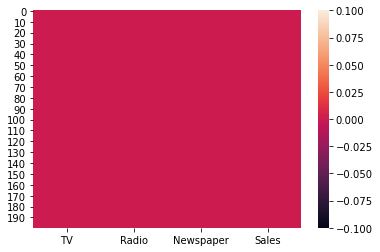

In [12]:
sns.heatmap(sp.isna())

In [13]:
advertising_data = pd.DataFrame(sp)

In [14]:
correlation_matrix = sp.corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


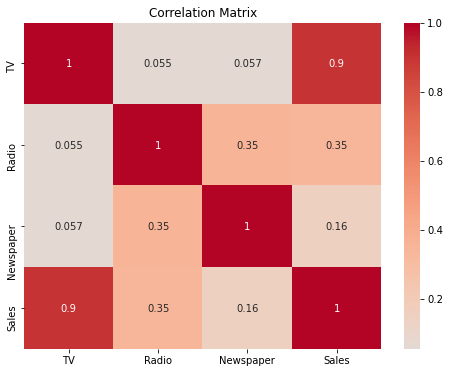

In [15]:
# Correlation matrix heatmap
correlation_matrix = advertising_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

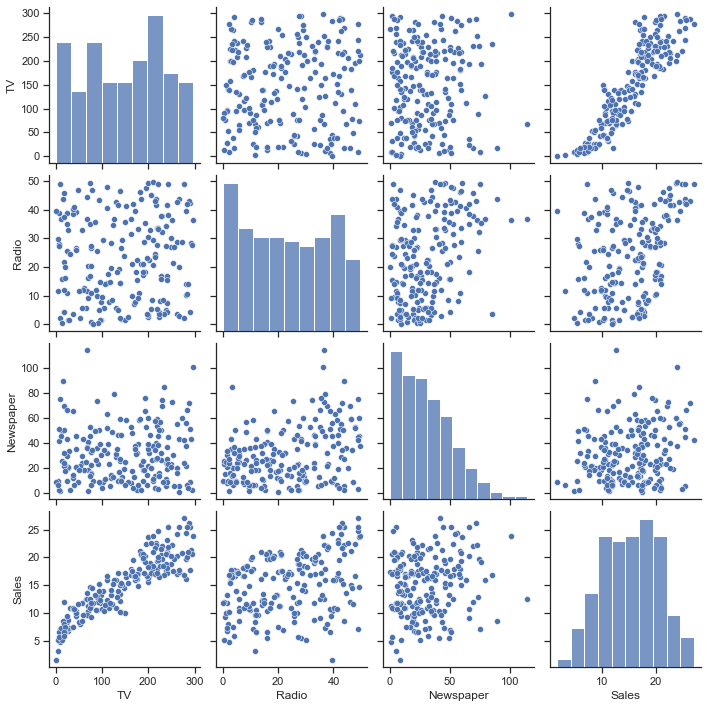

In [16]:
# Scatterplot matrix
sns.set(style='ticks')
sns.pairplot(advertising_data, kind='scatter')
plt.show()

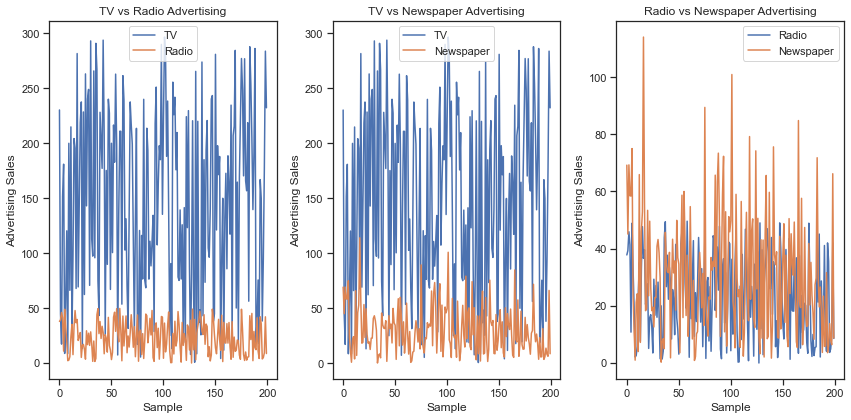

In [17]:
# Line plot for each advertising type
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(advertising_data['TV'], label='TV')
plt.plot(advertising_data['Radio'], label='Radio')
plt.xlabel('Sample')
plt.ylabel('Advertising Sales')
plt.title('TV vs Radio Advertising')
plt.legend()

plt.subplot(132)
plt.plot(advertising_data['TV'], label='TV')
plt.plot(advertising_data['Newspaper'], label='Newspaper')
plt.xlabel('Sample')
plt.ylabel('Advertising Sales')
plt.title('TV vs Newspaper Advertising')
plt.legend()

plt.subplot(133)
plt.plot(advertising_data['Radio'], label='Radio')
plt.plot(advertising_data['Newspaper'], label='Newspaper')
plt.xlabel('Sample')
plt.ylabel('Advertising Sales')
plt.title('Radio vs Newspaper Advertising')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
#Target and feature variables

x = sp[['TV','Radio','Newspaper']]  # Feature variable
y = sp['Sales']  # Target variable

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test)

In [24]:
# Assuming y_test and y_pred are your true and predicted values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 2.72
Root Mean Squared Error: 1.65
Mean Absolute Error: 1.22


-Range for three errors indicates as 0 to positive infinity


Mean Squared Error (MSE):

Value: 2.72
Interpretation: A lower MSE indicates better model performance. The value of 2.72 suggests that, on average, the squared difference between predicted and true values is 2.72. Since it's a squared value, it's not directly interpretable in the original units of the target variable.

Root Mean Squared Error (RMSE):

Value: 1.65
Interpretation: RMSE is the square root of MSE. Like MSE, a lower RMSE indicates better model performance. The value of 1.65 suggests that, on average, the difference between predicted and true values is around 1.65 units (in the original units of the target variable).

Mean Absolute Error (MAE):

Value: 1.22
Interpretation: MAE represents the average absolute difference between predicted and true values. Like MSE and RMSE, a lower MAE is indicative of better model performance. The value of 1.22 suggests that, on average, the absolute difference between predicted and true values is 1.22 units (in the original units of the target variable).

In summary, lower values for all three metrics indicate better model performance. RMSE and MAE are directly interpretable in the original units of the target variable, making them useful for understanding the practical implications of the errors. Keep in mind that the acceptable ranges for these metrics can vary depending on the context of your problem and the nature of the data you're working with.

References:

1.Practical statistics for Data scientists Book